In [1]:
import numpy as np
import keras
import pandas

from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from sympy import *

init_printing(use_latex=True)
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Attribute Information:

0: Nothing in hand; not a recognized poker hand
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush


10 target classes.

In [20]:
"""
https://archive.ics.uci.edu/ml/datasets/Poker+Hand
"""

#you will prob have to change path location to load data.
train_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
test_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

#setting attribute info, column names for data set. 
# S1 refers to Suit of card #1
# C1 refers to Rank of card #1 and so on.
# see data set attributes (poker-hand.names)
column = ['S1', 'C1', 'S2', 'C2', 'S3','C3','S4','C4','S5','C5','class']
suit = ['S1','S2','S3','S4','S5']
rank = ['C1','C2','C3','C4','C5']
_class = ['class']


#labeling
poker_train = np.array((pandas.read_table(train_path,names=column,
                            #delim_whitespace=True,
                            header=None,sep =',')))
poker_tst = np.array((pandas.read_table(test_path,names=column,
                            #delim_whitespace=True,
                            header=None,sep =',')))

print(poker_train.shape,'train')
print(poker_tst.shape,'test')

#for each attribute of suit of cards we will convert var into category
#this will allow us to do one hot encoding / dummy encoding later on
#for i in suit:
#    poker_train[i] = poker_train[i].astype('category')
#    poker_tst[i] = poker_tst[i].astype('category')
    
# suits are now one hot encoded
#poker_train = pandas.get_dummies(poker_train)
#poker_tst = pandas.get_dummies(poker_tst)

#print(poker_train)
#print(poker_tst)
#print(poker_train.shape)
#print(poker_train)

(25010, 11) train
(1000000, 11) test


In [21]:
#Building MODEL

#26 variables, also convert into category and do our one hot encoding.

#X = np.array(poker_train.drop('class',axis=1))
X = poker_train[:,0:10]
labels = poker_train[:,10]
#one hot encoding categorical values
#get_dummies creates dummy/indicator variables (1 or 0).
#Y2 = pandas.get_dummies(poker_train['class'].astype('category'))
Y = keras.utils.to_categorical(labels,
                               len(np.unique(labels)))
#print(Y)

#validation set
#test_X = np.array(poker_tst.drop('class',axis=1))
test_X = poker_tst[:,0:10]
olabels = poker_tst[:,10]
#test_y2 = pandas.get_dummies(poker_tst['class'].astype('category'))
test_Y = keras.utils.to_categorical(olabels,
                               len(np.unique(olabels)))

print(test_X.shape)
print(test_Y.shape)

#######    MODEL ########

model = keras.models.Sequential()

model.add(keras.layers.Dense(512,input_dim=10,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()


(1000000, 10)
(1000000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 536,074
Trainable params: 536,074
Non-trainable params: 0
_________________________________________________________________


In [27]:
print(X[0,:])
print(X[0,:].shape)

[ 1 10  1 11  1 13  1 12  1  1]
(10,)


In [22]:
batch_size = 100
epochs = 25
history = model.fit(X,Y,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(test_X, test_Y))


Train on 25010 samples, validate on 1000000 samples
Epoch 1/25
25010/25010 [==============================] - 54s 2ms/step - loss: 0.9968 - acc: 0.5142 - val_loss: 0.9614 - val_acc: 0.5411
Epoch 2/25
25010/25010 [==============================] - 53s 2ms/step - loss: 0.9559 - acc: 0.5457 - val_loss: 0.9553 - val_acc: 0.5288
Epoch 3/25
25010/25010 [==============================] - 54s 2ms/step - loss: 0.9439 - acc: 0.5536 - val_loss: 0.9353 - val_acc: 0.5608
Epoch 4/25
25010/25010 [==============================] - 53s 2ms/step - loss: 0.9356 - acc: 0.5611 - val_loss: 0.9291 - val_acc: 0.5636
Epoch 5/25
25010/25010 [==============================] - 53s 2ms/step - loss: 0.9259 - acc: 0.5672 - val_loss: 0.9225 - val_acc: 0.5701
Epoch 6/25
25010/25010 [==============================] - 54s 2ms/step - loss: 0.9088 - acc: 0.5769 - val_loss: 0.9012 - val_acc: 0.5861
Epoch 7/25
25010/25010 [==============================] - 53s 2ms/step - loss: 0.8882 - acc: 0.5922 - val_loss: 0.8877 - val_a

In [23]:
#   Model Accuracy
score = model.evaluate(X, Y, verbose=1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

25010/25010 [==============================] - 2s 99us/step
Test loss: 0.0795012926328
Test accuracy: 0.980567772891


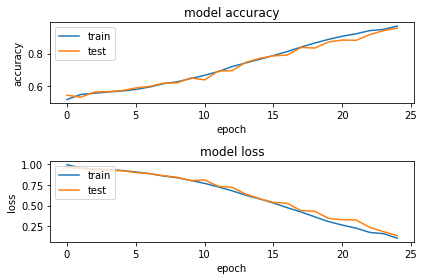

In [24]:
#   Plotting
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
model.save('ffbnn.h5')

In [39]:
pls = np.array([[ 2 , 4 , 1 , 13 , 4 , 9 , 1 , 5 , 4 , 13]])
preds = model.predict(pls)
print(preds)
print(pls)
print(np.argmax(preds))

[[  2.93444190e-03   9.46342051e-01   5.06027862e-02   2.86197314e-06
    2.11711999e-08   7.95474122e-08   1.13079252e-04   1.12993631e-12
    4.65665016e-06   4.49812271e-11]]
[[ 2  4  1 13  4  9  1  5  4 13]]
1
